In [9]:
import pandas as pd

file_path = '/kaggle/input/demand/reversed_finaldatacsv.xlsx'

df = pd.read_excel(file_path)
df.head()

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0


In [10]:
df['Datetime_formatted'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M:%S')

In [11]:
df

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
0,01-01-2016 08:00:00,4140.0,4140,3734,113,0,2016-01-01 08:00:00
1,01-01-2016 09:00:00,3941.0,3941,3551,113,0,2016-01-01 09:00:00
2,01-01-2016 10:00:00,3724.0,3724,3286,133,0,2016-01-01 10:00:00
3,01-01-2016 11:00:00,3603.0,3603,3168,130,0,2016-01-01 11:00:00
4,01-01-2016 12:00:00,3590.0,3590,3145,140,0,2016-01-01 12:00:00
...,...,...,...,...,...,...,...
70464,15-01-2024 08:00:00,8619.0,8619,4331,866,2434,2024-01-15 08:00:00
70465,15-01-2024 09:00:00,9018.0,9018,4224,1202,2572,2024-01-15 09:00:00
70466,15-01-2024 10:00:00,9162.0,9162,4223,1300,2573,2024-01-15 10:00:00
70467,15-01-2024 11:00:00,9211.0,9211,4101,1427,2567,2024-01-15 11:00:00


In [12]:
daily_counts = df.groupby(df['Datetime_formatted'].dt.date).size()
daily_counts 

Datetime_formatted
2016-01-01    16
2016-01-02    24
2016-01-03    24
2016-01-04    24
2016-01-05    24
              ..
2024-01-11    24
2024-01-12    24
2024-01-13    24
2024-01-14    24
2024-01-15    13
Length: 2937, dtype: int64

In [13]:
num_days_with_24_entries = (daily_counts == 24).sum()
num_days_with_24_entries

2935

In [14]:
dates_to_keep = daily_counts[daily_counts == 24].index
df_filtered = df[df['Datetime_formatted'].dt.date.isin(dates_to_keep)]
df_filtered

,Datetime,Generation(MW),Demand(MW),Gas,Liquid Fuel,Coal,Datetime_formatted
16,02-01-2016 00:00:00,3737.0,3737,3269,123,0,2016-01-02 00:00:00
17,02-01-2016 01:00:00,4023.0,4023,3312,198,0,2016-01-02 01:00:00
18,02-01-2016 02:00:00,5606.0,5606,3786,1313,0,2016-01-02 02:00:00
19,02-01-2016 03:00:00,5847.0,5847,4235,1099,0,2016-01-02 03:00:00
20,02-01-2016 04:00:00,5880.0,5880,4287,1080,0,2016-01-02 04:00:00
...,...,...,...,...,...,...,...
70451,14-01-2024 19:00:00,10209.0,10209,4240,2459,2464,2024-01-14 19:00:00
70452,14-01-2024 20:00:00,10289.0,10289,4369,2391,2513,2024-01-14 20:00:00
70453,14-01-2024 21:00:00,10004.0,10004,4421,2099,2406,2024-01-14 21:00:00
70454,14-01-2024 22:00:00,9560.0,9560,4237,1864,2381,2024-01-14 22:00:00


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

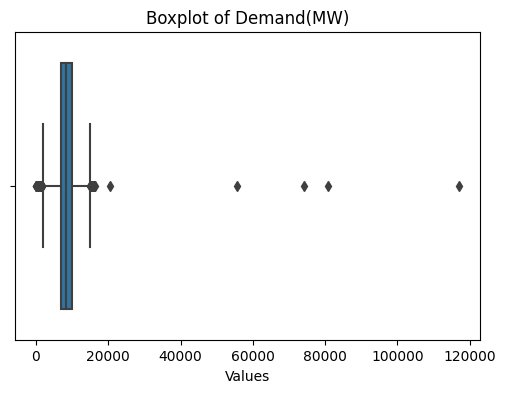

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [17]:
df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)

<ipython-input-17-1d42b4394300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Demand(MW)'] = df_filtered['Demand(MW)'].clip(upper=18000)


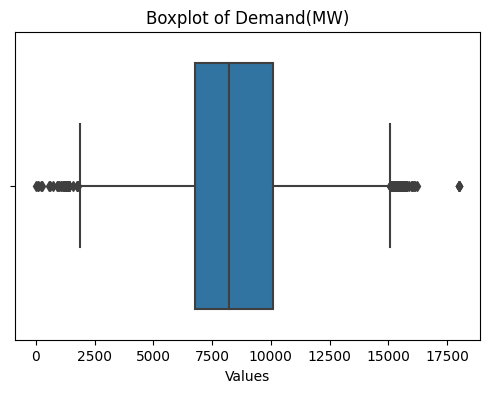

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['Demand(MW)'])
plt.title('Boxplot of Demand(MW)')
plt.xlabel('Values')

plt.show()

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [20]:
demand_data = df_filtered['Demand(MW)'].values

In [21]:
demand_data

array([ 3737,  4023,  5606, ..., 10004,  9560,  8793])

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(demand_data.reshape(-1, 1))
data_scaled

array([[0.20734689],
       [0.22324108],
       [0.31121485],
       ...,
       [0.55562965],
       [0.53095476],
       [0.48832944]])

In [36]:
train_samples = 2800 * 24
val_samples = 2 * 24
test2_samples = 2 * 24
test7_samples = 7 * 24
look_back = 24

In [37]:
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

In [38]:
train_data = data_scaled[:train_samples]  
val_data = data_scaled[train_samples:train_samples + val_samples]  
test2_data = data_scaled[train_samples + val_samples:train_samples + val_samples + test2_samples] 
test7_data = data_scaled[train_samples + val_samples + test2_samples:train_samples + val_samples + test2_samples + test7_samples]

In [39]:
X_train, y_train = create_dataset(train_data, look_back)
X_test2, y_test2 = create_dataset(test2_data, look_back)
X_test7, y_test7 = create_dataset(test7_data, look_back)
X_val, y_val = create_dataset(val_data, look_back)

In [40]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)
X_test7 = X_test7.reshape(X_test7.shape[0], X_test7.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [41]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01))),  
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01))),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01))),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1)
])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce learning rate by a factor of 0.5
    patience=5,          # Wait 5 epochs before reducing
    min_lr=1e-6          # Minimum learning rate
)

In [44]:
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse')

In [45]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Increase epochs since early stopping will handle stopping
    batch_size=128,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]  # Add callbacks
)

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 5.2136 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0403 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0394 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0391 - val_loss: 0.0380 - learning_rate: 0.0010
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0387 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0381 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0380 - val_loss: 0.0376 - learning_rate: 0.0010
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0378 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 9/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0375 - val_loss: 0.0371 - learn

In [46]:
loss_history = pd.DataFrame({
    'epoch': range(1, len(history.history['loss']) + 1),
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']  
})

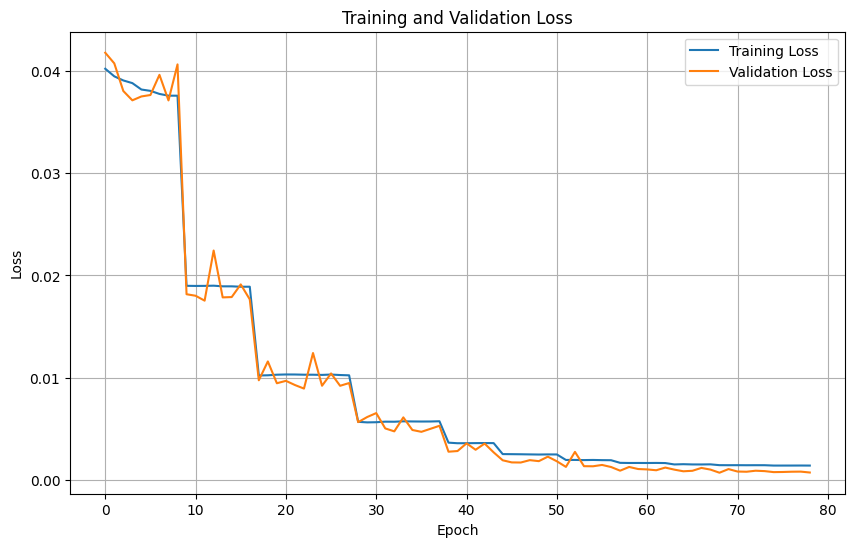

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'][1:], label='Training Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')  # Save the plot as an image
plt.show()

In [49]:
y_pred2 = model.predict(X_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


In [50]:
y_pred_inverse2 = scaler.inverse_transform(y_pred2)
y_test_inverse2 = scaler.inverse_transform(y_test2) 

In [51]:
rmse = np.sqrt(mean_squared_error(y_test_inverse2, y_pred_inverse2))
mse = mean_squared_error(y_test_inverse2, y_pred_inverse2) 
mape = mean_absolute_percentage_error(y_test_inverse2, y_pred_inverse2)
r2 = r2_score(y_test_inverse2, y_pred_inverse2)

In [52]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:361.7030768075503,
 MSE:130829.11577204865,
 MAPE:2.030926789983351%,
 R-Squared:0.7100628268065869


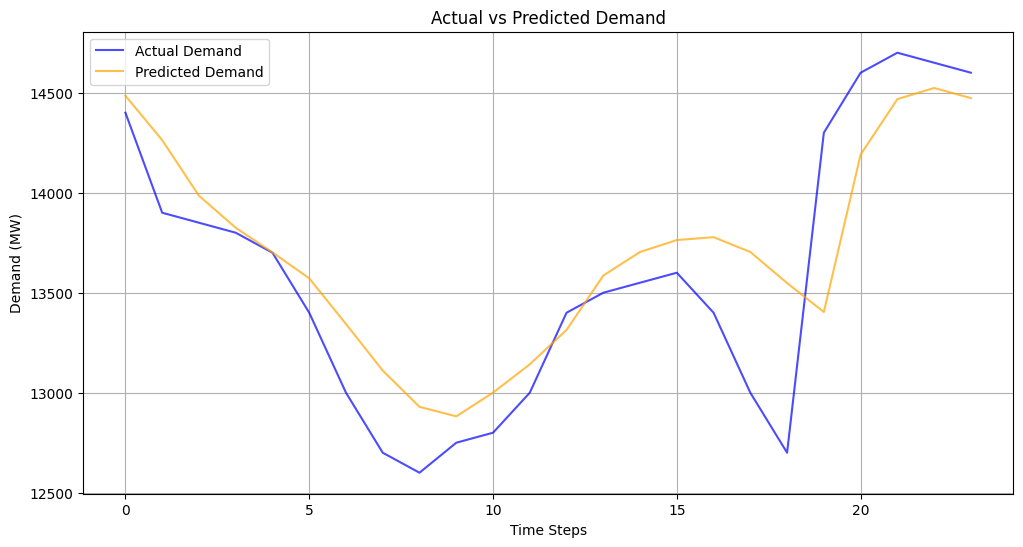

In [53]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse2.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred_inverse2.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
y_pred7 = model.predict(X_test7)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


In [57]:
y_pred_inverse7 = scaler.inverse_transform(y_pred7)
y_test_inverse7 = scaler.inverse_transform(y_test7)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test_inverse7, y_pred_inverse7))
mse = mean_squared_error(y_test_inverse7, y_pred_inverse7) 
mape = mean_absolute_percentage_error(y_test_inverse7, y_pred_inverse7)
r2 = r2_score(y_test_inverse7, y_pred_inverse7)

In [59]:
print(f" RMSE:{rmse},\n MSE:{mse},\n MAPE:{mape*100}%,\n R-Squared:{r2}")

 RMSE:562.5351017981379,
 MSE:316445.74075504136,
 MAPE:3.4157226691326654%,
 R-Squared:0.7986981370877348


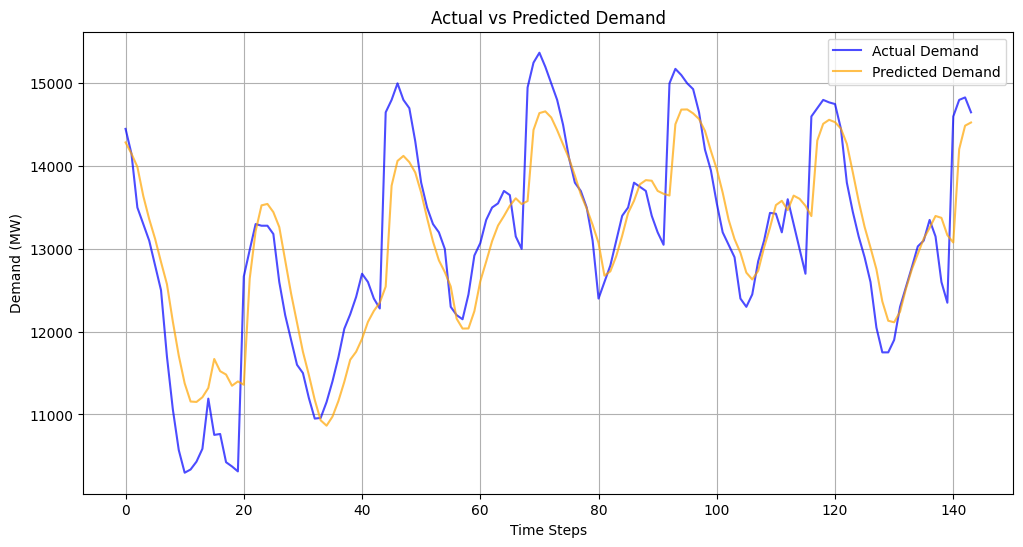

In [60]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Demand
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse7.flatten(), label='Actual Demand', color='blue', alpha=0.7)
plt.plot(y_pred_inverse7.flatten(), label='Predicted Demand', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()